<ins><b>Neural Network & Deep Learning : Experiment No. 1</b></ins>


<ins><b>Lab - 1 :</b></ins> Implementation of Perceptron from scratch

# Key components of the Lab Experiment

1. Reading the dataset
2. Exploratory Data Analsis
3. Pre-processing
4. Test-Train Split
5. Implementation of the Perceptron
6. Tuning the number of epochs
7. Final Model
8. References

# Importing the required modules

In [353]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder

# Reading the dataset

In [354]:
df = pd.read_csv("crx.csv",header=None)

In [355]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
1,b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
3,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+


In [356]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
1,b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
3,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 1 to 690
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      690 non-null    object
 1   a2      690 non-null    object
 2   s3      690 non-null    object
 3   a4      690 non-null    object
 4   a5      690 non-null    object
 5   a6      690 non-null    object
 6   a7      690 non-null    object
 7   a8      690 non-null    object
 8   a9      690 non-null    object
 9   a10     690 non-null    object
 10  a11     690 non-null    object
 11  a12     690 non-null    object
 12  a13     690 non-null    object
 13  a14     690 non-null    object
 14  a15     690 non-null    object
 15  a16     690 non-null    object
dtypes: object(16)
memory usage: 86.4+ KB


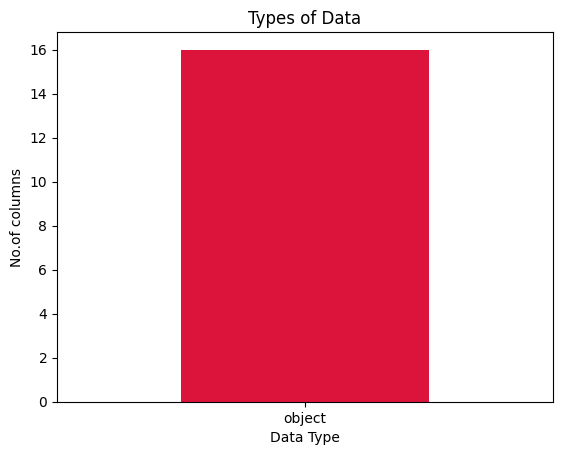

In [358]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

The dataset has mainly categorical variables and few numericals variables.

# Exploratory Data Analysis

In Exploratory Data Analysis the following parts are included:
1. Seggragation of columns (into categorical and numerical)
2. Analysis of Missing Values
3. Target Variable Class Distribution

## Seggregating columns

The columns with data type as Object are considered as categorical while others are considered as numerical.

In [359]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [360]:
cat_cols

['a1',
 'a2',
 's3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'a10',
 'a11',
 'a12',
 'a13',
 'a14',
 'a15',
 'a16']

## Missing Values Analysis

Since, the UCI data repository mentions missing values as "?" instead of null values the analysis has to be carried out accordingly.

In [361]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

In [362]:
null_freq

[1.7391304347826086,
 1.7391304347826086,
 0,
 0.8695652173913043,
 0.8695652173913043,
 1.3043478260869565,
 1.3043478260869565,
 0,
 0,
 0,
 0,
 0,
 0,
 1.8840579710144927,
 0,
 0]

Only 2% of the rows have null values and hence the rows can be dropped directly instead of applying any imputation techniques.

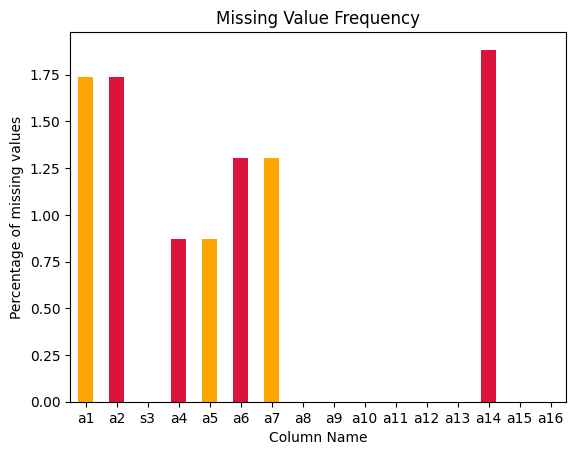

In [363]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

## Target Variable Analysis

The dataset is slightly biased towards "-" class since has significantly more entries.

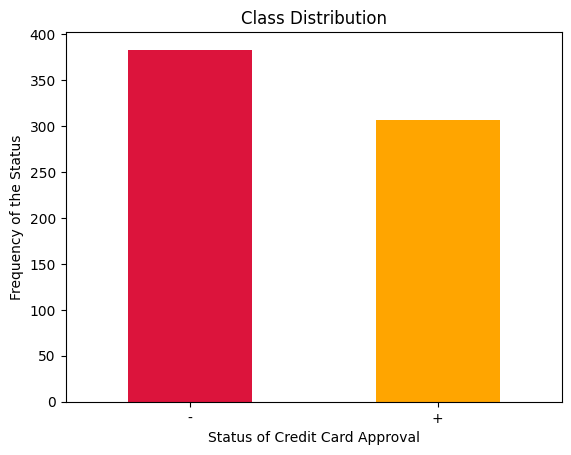

In [364]:
df['a16'].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

# Pre-processing

## Handling Missing Values

In [365]:
df = df.replace({"?":None})

In [366]:
df = df.dropna()

In [367]:
df.shape

(653, 16)

In [368]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

# Remove rows with values outside the acceptable range
df = df[~((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]


0   a1     a2      s3 a4 a5  a6  a7    a8 a9 a10 a11 a12 a13    a14  a15 a16
1    b  30.83       0  u  g   w   v  1.25  t   t  01   f   g  00202    0   +
2    a  58.67    4.46  u  g   q   h  3.04  t   t  06   f   g  00043  560   +
3    a  24.50     0.5  u  g   q   h   1.5  t   f   0   f   g  00280  824   +
4    b  27.83    1.54  u  g   w   v  3.75  t   t  05   t   g  00100    3   +
5    b  20.17   5.625  u  g   w   v  1.71  t   f   0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ..  ..  ..    ...  ...  ..
686  b  21.08  10.085  y  p   e   h  1.25  f   f   0   f   g  00260    0   -
687  a  22.67    0.75  u  g   c   v     2  f   t  02   t   g  00200  394   -
688  a  25.25    13.5  y  p  ff  ff     2  f   t  01   t   g  00200    1   -
689  b  17.92   0.205  u  g  aa   v  0.04  f   f   0   f   g  00280  750   -
690  b  35.00   3.375  u  g   c   h  8.29  f   f   0   t   g  00000    0   -

[653 rows x 16 columns]


In [369]:
df.shape

(653, 16)

In [370]:
df.head(5)

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
1,b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
3,a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Encoding the columns

In [371]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site

In [372]:
df = df.reset_index()

# Test Train Split

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df['a16'],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop('a16')
X_test.pop('a16')

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: a16, Length: 66, dtype: float64

In [374]:
X_train

,index,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
436,460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
75,77,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
55,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
49,50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
589,624,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
359,378,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
192,198,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
629,666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


# Perceptron

In [375]:
class Perceptron:

    # Initialising the required parameters for the perceptron.
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function.
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0

    # The model training or fitting by updating weights.
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)

    # Predicting on a single instance.
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))

    # Predicting on a larger number of instances and returning accuracy.
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

# Initialising the Perceptron Parameters

In [376]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

# Fitting the model

In [377]:
p.fit()

# Test Accuracy

In [378]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([48.48484848])

# Train Accuracy

In [379]:
p.test(X,y)

array([45.65587734])

# Tuning the number of epochs

In [380]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

In [381]:
epochs

[20, 40, 60, 80, 100, 120, 140, 160, 180]

# Train-Test Accuracies across different epochs

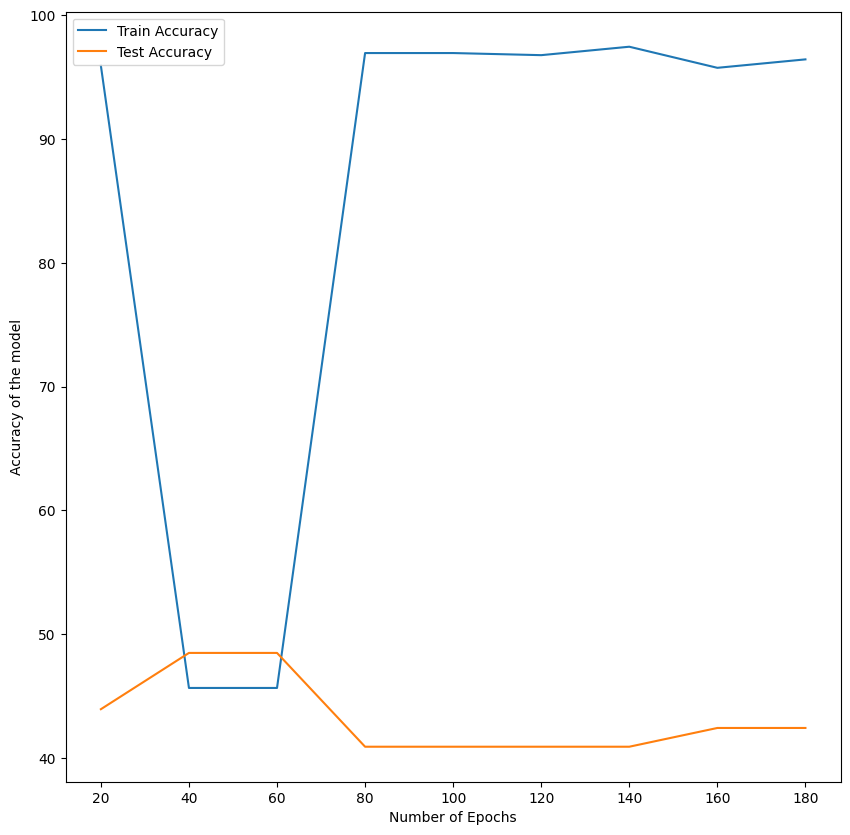

In [382]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()

# Final Model

In [383]:
tuning = pd.DataFrame({"epochs":np.array(epochs).squeeze(),"train accuracy":np.array(train_acc).squeeze(), "test accuracy":np.array(test_acc).squeeze()})

In [384]:
def diff(row):
    return row[1] - row[2]

In [385]:
tuning["Difference"] = tuning.apply(diff,axis=1)

/var/folders/fp/tqnwc7rd219_w0rxtd8b8pz00000gn/T/ipykernel_85185/844949158.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return row[1] - row[2]


In [386]:
tuning.sort_values(by="Difference")

,epochs,train accuracy,test accuracy,Difference
1,40,45.655877,48.484848,-2.828971
2,60,45.655877,48.484848,-2.828971
0,20,95.911414,43.939394,51.972020
7,160,95.741056,42.424242,53.316814
8,180,96.422487,42.424242,53.998245
5,120,96.763203,40.909091,55.854112
3,80,96.933560,40.909091,56.024470
4,100,96.933560,40.909091,56.024470
6,140,97.444634,40.909091,56.535543


The best model is the one which is trained for 40 epochs. There can be many other hyperparameters but since Perceptron is coded from scratch those cannot be incorporated. The one with 80 epoches is not considered since the train accuracy must be greater than the test accuracy because the model is trained on the former.

Apply the perceptron to anyone of the dataset from the following link.

https://www.kaggle.com/datasets?tags=14201-Binary+Classification

Prepare the Part B and upload.

# References

About Perceptron : https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/

For Perceptron from scratch : https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

Dataset : https://archive.ics.uci.edu/ml/datasets/credit+approval